## Team 4
## Project 2:
## Problem Statement :
 Based on the given dataset predict the House Sale Prices using   Linear  Regression. 

### Mission 1:
#### Instruction :
* Read AmesHousing.txt into a dataframe using the tab delimiter (\t) and assign to data.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
from sklearn.linear_model import LinearRegression

In [2]:
ame=pd.read_csv('DataFile/AmesHousing.csv',delimiter='\t')
ame.head(6)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500


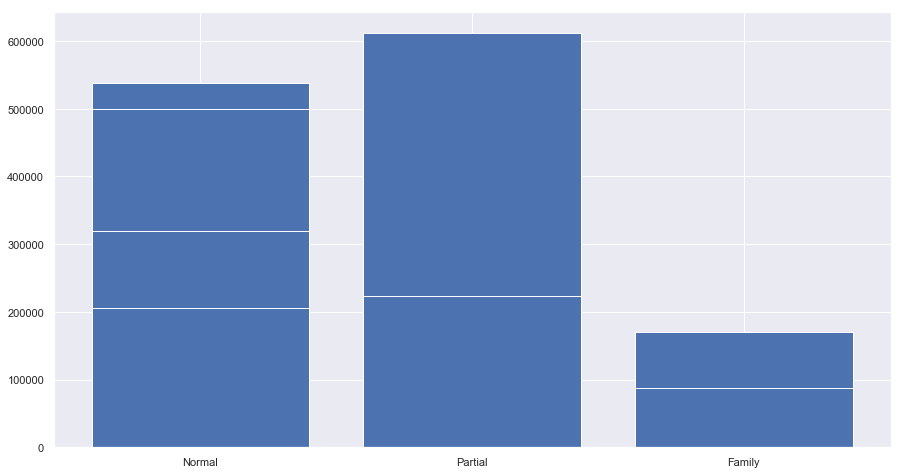

In [44]:
fig=plt.figure(figsize=(15,8))
plt.bar(ame['Sale Condition'].head(50),ame['SalePrice'].head(50))
plt.show()

#### Heat Map of the data 

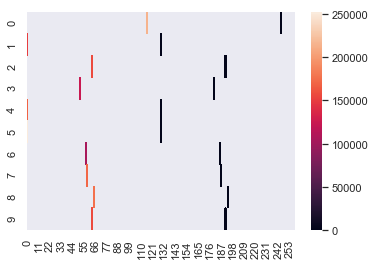

In [19]:
sns.set()
sns.heatmap(np.array(ame.pivot('PID','Lot Frontage',['SalePrice','Garage Area']).head(10)))

### Mission 2 : Introduction to the Data

#### Instructions :

* Select the first 1460 rows from from data and assign to train.
* Select the remaining rows from data and assign to test.
* Use the dataframe.info() method to display information about each column.
* Read the data documentation to get more familiar with each column.
* Using the data documentation, determine which column is the target column we want to predict. Assign the column name as a string to target.

In [4]:
train_X=ame[['Garage Area','Gr Liv Area','Overall Cond']].iloc[:1461]      # Select the first 1460 rows from from data and assign to train.
test_X=ame[['Garage Area','Gr Liv Area','Overall Cond']].iloc[1461:1931]    # Select the remaining rows from data and assign to test.
train_X.info()                    ## display information about each column in train_X
test_X.info()                     ## display information about each column in test_X 
ame['Target']=ame['SalePrice']
train_y=ame['Target'].iloc[:1461].to_frame()
test_y=ame['Target'].iloc[1461:1931].to_frame()
train_y.info()                    ## display information about each column in train_y 
test_y.info()                     ## display information about each column in test_y 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 3 columns):
Garage Area     1461 non-null float64
Gr Liv Area     1461 non-null int64
Overall Cond    1461 non-null int64
dtypes: float64(1), int64(2)
memory usage: 34.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 1461 to 1930
Data columns (total 3 columns):
Garage Area     470 non-null float64
Gr Liv Area     470 non-null int64
Overall Cond    470 non-null int64
dtypes: float64(1), int64(2)
memory usage: 11.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 1 columns):
Target    1461 non-null int64
dtypes: int64(1)
memory usage: 11.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 1461 to 1930
Data columns (total 1 columns):
Target    470 non-null int64
dtypes: int64(1)
memory usage: 3.7 KB


### Mission 3: Simple Linear Regression 
#### Instructions :
* The first plot should plot the Garage Area column on the x-axis against the SalePrice column on the y-axis.
* The second one should plot the Gr Liv Area column on the x-axis against the SalePrice column on the y-axis.
* The third one should plot the Overall Cond column on the x-axis against the SalePrice column on the y-axis.


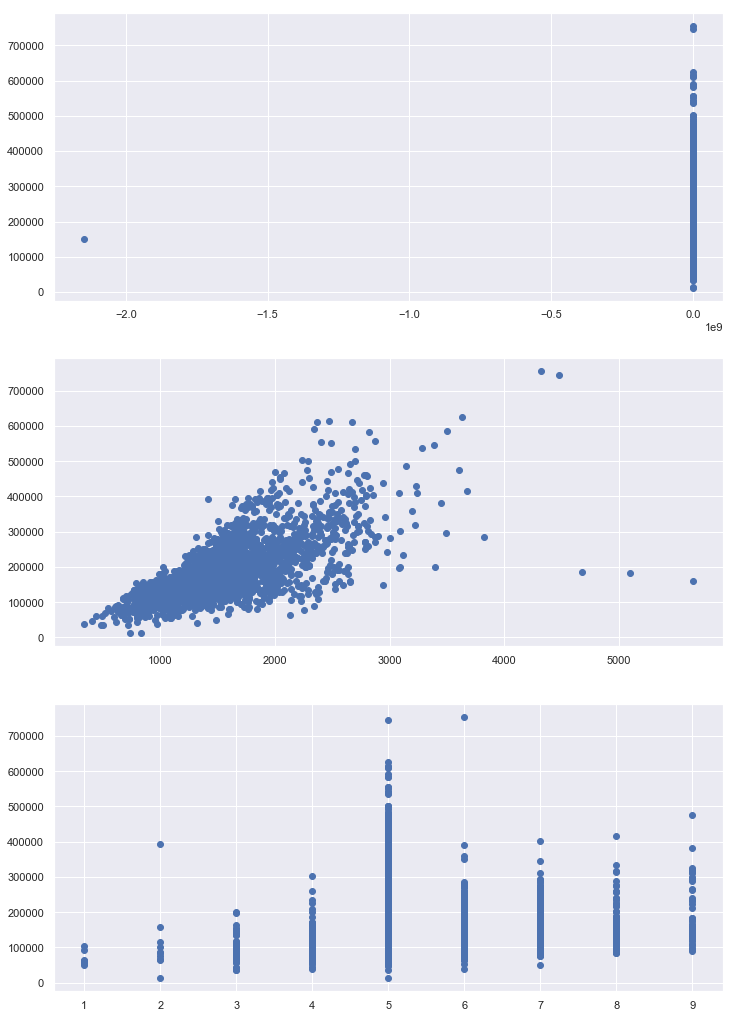

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,18))
plt.xlabel('SalePrice')
plt.ylabel(('Garage Area','Gr Liv Area','Overall Cond'))
plt.subplot(3,1,1)
plt.scatter((np.array(ame['Garage Area']).astype(int).tolist()),(np.array(ame['SalePrice']).astype(int).tolist()))
plt.subplot(3,1,2)
plt.scatter((np.array(ame['Gr Liv Area']).astype(int).tolist()),(np.array(ame['SalePrice']).astype(int).tolist()))
# plt.scatter((ame['Gr Liv Area']).to_list(),ame['SalePrice'].to_list())
plt.subplot(3,1,3)
plt.scatter((np.array(ame['Overall Cond']).astype(int).tolist()),(np.array(ame['SalePrice']).astype(int).tolist()))
# plt.scatter(ame['Overall Cond'].to_list(),ame['SalePrice'].to_list())

### Mission 4:
#### Instruction :
* Confirming the above calculation by  correlating between pairs of these columns using the pandas.DataFrame.corr() method

In [6]:
ame[['Garage Area','Gr Liv Area','Overall Cond','SalePrice']].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.484892,-0.153754,0.640401
Gr Liv Area,0.484892,1.000000,-0.115643,0.706780
Overall Cond,-0.153754,-0.115643,1.000000,-0.101697
SalePrice,0.640401,0.706780,-0.101697,1.000000


### Mission 5: Using Scikit-Learn to Train and Predict
#### Instructions :
* Import and instantiate a linear regression model.
* Fit a linear regression model that uses the feature and target columns we explored in the last 2 screens. Use the default arguments.
* Display the coefficient and intercept of the fitted model using the coef_ and intercept_ attributes.
* Assign a1 to a1 and a0 to a0.


In [7]:
regr=LinearRegression()
regr.fit(train_X['Gr Liv Area'].to_frame(),train_y)
y_pred=regr.predict(test_X['Gr Liv Area'].to_frame()).astype(int)    # Predict using the linear model

In [8]:
print(regr.fit(test_X,y_pred) )                # Fit linear model.
# print('score ',regr.score(test_X,y_pred))      # Returns the coefficient of determination R^2 of the prediction.
a1= regr.coef_                                 # Estimated coefficients for the linear regression problem
a0=regr.intercept_
print('coefficient is',a1,'\n','intercept is',a0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
coefficient is [[6.05323461e-05 1.16924615e+02 9.94449220e-03]] 
 intercept is [5307.34146852]


### Mission 6: Making Predictions
    y^=116.924615x1+5307.34146852
   One way to interpret this model is "for every 1 square foot increase in above ground living area, we can expect the home's value to increase by approximately 116.87 dollars".
#### Instructions :
* Use the fitted model to make predictions on both the training and test sets.
* Calculate the RMSE value for the predictions on the training set and assign to train_rmse.
* Calculate the RMSE value for the predictions on the test set and assign to test_rmse.

#### Plotting the predicted and real values

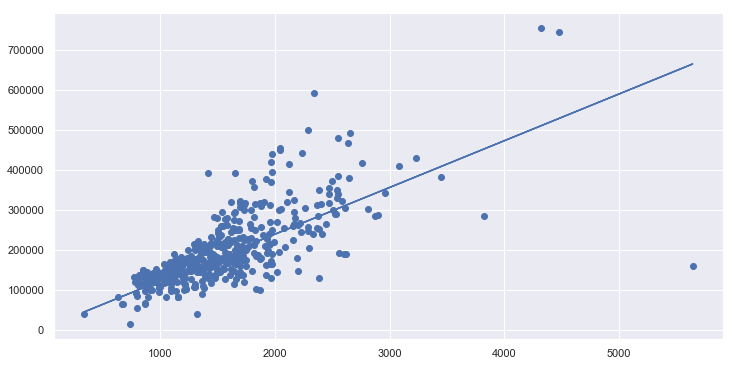

In [9]:
plt.figure(figsize=(12,6))
# plt.scatter(np.array(test_X[['Garage Area']].astype(int)).tolist(),np.array(test_y).tolist(),color='black')
plt.scatter(np.array(test_X[['Gr Liv Area']].astype(int)).tolist(),np.array(test_y).tolist())
# plt.scatter(np.array(test_X[['Overall Cond']].astype(int)).tolist(),np.array(test_y).tolist(),color='green')
plt.plot(test_X['Gr Liv Area'].to_frame(),y_pred)
plt.xticks()
plt.yticks()
plt.show()

### Linear Regression for Machine Learning
### 2. Feature Selection

#### Mission 1: Missing Values
##### Instructions
* Read AmesHousing.txt into a dataframe named data. Be sure to seperate on the \tdelimiter.
* Create a dataframe called train, which contains the first 1460 rows of data.
* Create a dataframe called test, which contains the rest of the rows of data.
* Select the integer and float columns from train and assign them to the variable numerical_train.
* Drop the following columns from numerical_train:
    * PID (place ID isn't useful for modeling)
    * Year Built
    * Year Remod/Add
    * Garage Yr Blt
    * Mo Sold
    * Yr Sold



In [10]:
# ame=ame.drop(['PID','Year Built','Year Remod/Add','Garage Yr Blt','Mo Sold','Yr Sold'],axis=1,inplace=False)
type(ame.values)

numpy.ndarray

#### Mission 1: Missing Values
##### Instructions
* Read AmesHousing.txt into a dataframe named data. Be sure to seperate on the \tdelimiter.
* Create a dataframe called train, which contains the first 1460 rows of data.
* Create a dataframe called test, which contains the rest of the rows of data.
* Select the integer and float columns from train and assign them to the variable numerical_train.
* Drop the following columns from numerical_train:
    * PID (place ID isn't useful for modeling)
    * Year Built
    * Year Remod/Add
    * Garage Yr Blt
    * Mo Sold
    * Yr Sold


In [13]:
# ame=ame.drop(['PID','Year Built','Year Remod/Add','Garage Yr Blt','Mo Sold','Yr Sold'],axis=1,inplace=False)
type(ame.values)

numpy.ndarray

In [14]:
lambda x: (x== dtype('int64') | x==dtype('float64')) ,[*ame.dtypes]
#(ame.dtypes[3])
ame.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu       object
Garage Type        object
Garage Yr Bl

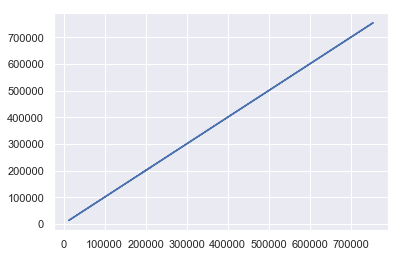

In [38]:
plt.plot(ame['SalePrice'],ame['Target'])